In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

In [2]:

# Cargar los datos usando el delimitador correcto
df = pd.read_csv('dataset.csv', delimiter=';', encoding='utf-8')

df.columns = df.columns.str.strip()

print(df.head())
print(df.columns)  

X = df.drop('Target', axis=1)  
y = df['Target'] 
X = df.drop('Target', axis=1) 
y = df['Target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)

# Búsqueda de hiperparámetros con GridSearchCV
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)
print("Métricas_de_clasificación:\n", classification_report(y_test, y_pred))

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

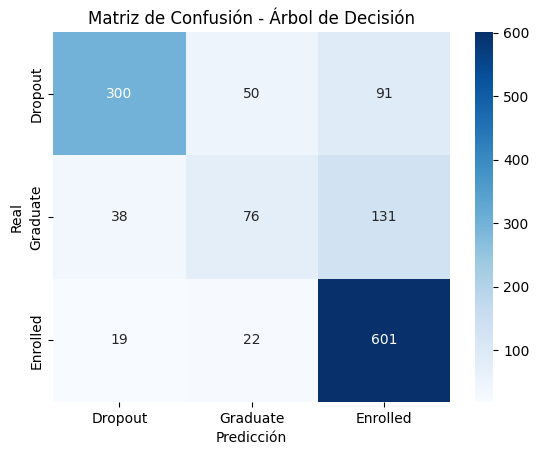

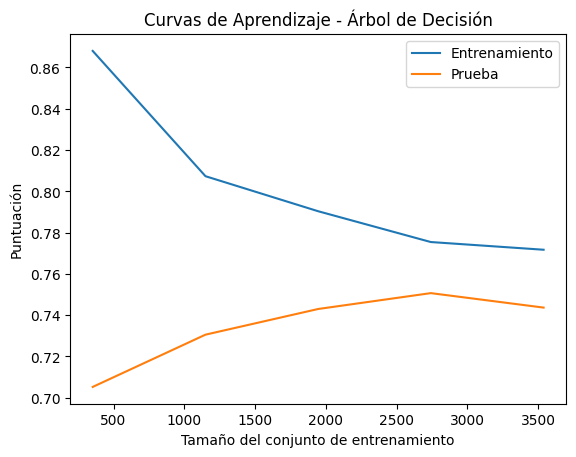

In [3]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['Target'].unique(), yticklabels=df['Target'].unique())
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_dt, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Prueba")
plt.title("Curvas de Aprendizaje - Árbol de Decisión")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación")
plt.legend()
plt.show()